<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Demo 9: Neural Network Basics
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

In [41]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Input data

In [42]:
# Input array
X = np.array([
  [1, 0, 1, 0],
  [1, 0, 1, 1],
  [0, 1, 0, 1]
])

# Output
y = np.array([
  [1],
  [1],
  [0]
])

In [43]:
#new set of data
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

## Functions

In [44]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# ReLU Function
def relu(x):
    return np.max(0, x)

# Derivative of ReLU Function
def relu_derivative(x):
    return 0 if x < 0 else 1

## Variable initialization

In [45]:
# Setting training iterations
epoch = 1000  #one epoch represents forward and back propagation of all the data once
# Setting learning rate 
lr = 0.1
# number of features in data set
input_layer_size = X.shape[1] #input size = 4 cause you have 4 features
# number of hidden layers neurons
hidden_layer_1_size = 3 #3 neurons in the hidden layer 
# number of neurons at output layer
output_layer_size = 1 #label

### Weights and Bias

In [46]:
# weight and bias initialization
wh1 = np.random.uniform(size = (input_layer_size, hidden_layer_1_size))
bh1 = np.random.uniform(size = (1, hidden_layer_1_size))
wout = np.random.uniform(size = (hidden_layer_1_size, output_layer_size))
bout = np.random.uniform(size = (1, output_layer_size))

## Calculation

In [47]:
cost = []
for i in range(epoch):
    # Forward Propagation
    hidden_layer_1 = np.dot(X, wh1)
    hidden_layer_1 = hidden_layer_1 + bh1
    hidden_layer_1_activation = sigmoid(hidden_layer_1)
    
    output_layer = np.dot(hidden_layer_1_activation, wout)
    output_layer = output_layer + bout
    
    output = sigmoid(output_layer)

    # Backpropagation
    E = y - output
    cost.append(np.square(E).sum())
    
    slope_output_layer = sigmoid_derivative(output)
    d_output = E * slope_output_layer
    
    error_hidden_layer_1 = d_output.dot(wout.T)
    slope_hidden_layer_1 = sigmoid_derivative(hidden_layer_1_activation)
    d_hidden_layer_1 = error_hidden_layer_1 * slope_hidden_layer_1
    
    wout += hidden_layer_1_activation.T.dot(d_output) * lr
    bout += np.sum(d_output,  axis = 0, keepdims = True) * lr
    wh1 += X.T.dot(d_hidden_layer_1) * lr
    bh1 += np.sum(d_hidden_layer_1,  axis = 0, keepdims = True) * lr
    print('epoch: {}, cost: {}'.format(i,np.square(E).sum()))

epoch: 0, cost: 43.427669047766706
epoch: 1, cost: 30.02049130218797
epoch: 2, cost: 27.966026225400768
epoch: 3, cost: 26.696118962701423
epoch: 4, cost: 26.893527612728814
epoch: 5, cost: 26.495913453700922
epoch: 6, cost: 26.71572528839819
epoch: 7, cost: 26.41228897007494
epoch: 8, cost: 26.629214225229184
epoch: 9, cost: 26.359641129576033
epoch: 10, cost: 26.568423351510837
epoch: 11, cost: 26.31663699654456
epoch: 12, cost: 26.515753499057958
epoch: 13, cost: 26.276506864889225
epoch: 14, cost: 26.46547785777382
epoch: 15, cost: 26.236889164041948
epoch: 16, cost: 26.415588831127963
epoch: 17, cost: 26.19692502515522
epoch: 18, cost: 26.365367861815546
epoch: 19, cost: 26.156302878807168
epoch: 20, cost: 26.314571118791406
epoch: 21, cost: 26.1149214924211
epoch: 22, cost: 26.263139258662815
epoch: 23, cost: 26.072765800339024
epoch: 24, cost: 26.21108960858886
epoch: 25, cost: 26.029859584145626
epoch: 26, cost: 26.158474693530746
epoch: 27, cost: 25.98624687750043
epoch: 28, c

## Results

In [48]:
ii = range(len(y))
yy = y.flatten()
oo = output.flatten()
ab = np.abs(oo - yy)
bo = np.array([0 if oi < 0.5 else 1 for oi in oo])
tt = ['Yes' if ti else 'No' for ti in (yy == bo)]

print('index Expect Output Error Binary Correct')
print('----- ------ ------ ----- ------ -------')
ima = int((0.9 * len(yy)))
imi = len(yy) - ima
dots = False
for i, a, b, c, d, e in zip(ii, yy, oo, ab, bo, tt):
    #if (i < imi) | (i > ima):
    print(' %3d     %d    %.2f   %.2f    %d     %s' % (i, a, b, c, d, e))
    #else:
    #    if dots:
    #        print(' ...')
    #        dots = False
aa = (yy == bo).sum() / len(yy)
print('\nCost Minimum: %.4f' % min(cost))
print('Accuracy    : %.2f' % aa)

index Expect Output Error Binary Correct
----- ------ ------ ----- ------ -------
   0     1    0.46   0.54    0     No
   1     1    0.78   0.22    1     Yes
   2     1    0.84   0.16    1     Yes
   3     1    0.78   0.22    1     Yes
   4     1    0.76   0.24    1     Yes
   5     0    0.17   0.17    0     Yes
   6     0    0.42   0.42    0     Yes
   7     0    0.80   0.80    1     No
   8     0    0.58   0.58    1     No
   9     1    0.79   0.21    1     Yes
  10     0    0.20   0.20    0     Yes
  11     1    0.44   0.56    0     No
  12     0    0.29   0.29    0     Yes
  13     1    0.80   0.20    1     Yes
  14     0    0.42   0.42    0     Yes
  15     0    0.13   0.13    0     Yes
  16     0    0.08   0.08    0     Yes
  17     0    0.26   0.26    0     Yes
  18     0    0.13   0.13    0     Yes
  19     1    0.72   0.28    1     Yes
  20     0    0.17   0.17    0     Yes
  21     1    0.75   0.25    1     Yes
  22     0    0.75   0.75    1     No
  23     1    0.90   0.10 

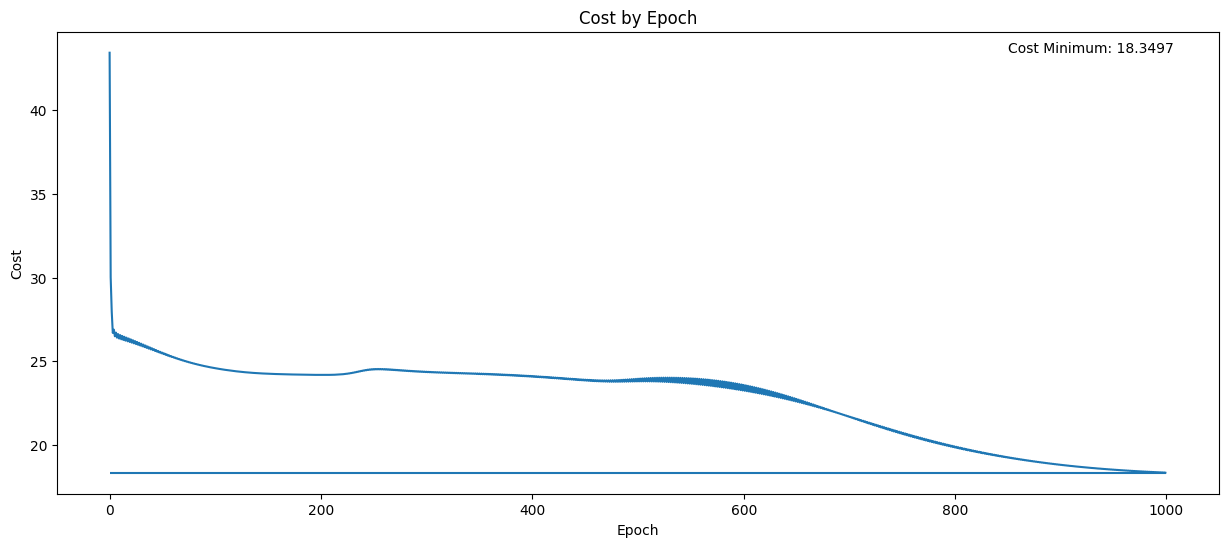

In [49]:
plt.figure(figsize = (15, 6))
plt.plot(cost)
plt.hlines(min(cost), 0, epoch)
plt.text(epoch - 150, max(cost), 'Cost Minimum: %.4f' % min(cost))
plt.title('Cost by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Create new data and re-run
Create new data and re-run from **Weights and Bias**.

In [50]:
X = np.random.binomial(1, 0.7, (100, 7))
y = np.random.binomial(1, 0.5, (X.shape[0], 1))

input_layer_size = X.shape[1]
hidden_layer_1_size = 5

In [51]:
y

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



